## Features Extraction from 2D image using Haar Wavelet Transform

In [51]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data
import cv2
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from pyppca import ppca
%matplotlib inline

In [52]:
# Read an image from the dataset as grayscale image
image = cv2.imread("MangoLeavesDatabase/Alphonso/front/alphonso_front_00_0.jpg", cv2.IMREAD_GRAYSCALE)

### Applying first level decomposition using Haar Wavelet Transform on input image

In [53]:
# minmax_scaler = MinMaxScaler(feature_range=(0, 1))
LL1, (LH1, HL1, HH1) = pywt.dwt2(image, 'haar')

# LL1 = minmax_scaler.fit_transform(LL1)
# HL1 = minmax_scaler.fit_transform(HL1)
# LH1 = minmax_scaler.fit_transform(LH1)

### LL1 is the approximation coefficient and contains maximum information of the image after decomposition and hence we use it for 2nd level decomposition

In [54]:
LL2, (LH2, HL2, HH2) = pywt.dwt2(LL1, 'haar')

# LL2 = minmax_scaler.fit_transform(LL2)
# HL2 = minmax_scaler.fit_transform(HL2)
# LH2 = minmax_scaler.fit_transform(LH2)

### LL2 is the approximation cofficient and contains maximum information of LL1 and hence we use it for 3rd level decomposition

In [55]:
LL3, (LH3, HL3, HH3) = pywt.dwt2(LL2, 'haar')

# LL3 = minmax_scaler.fit_transform(LL3)
# HL3 = minmax_scaler.fit_transform(HL3)
# LH3 = minmax_scaler.fit_transform(LH3)

### We repeat this decomposition process upto two more levels to get LL4 and LL5

In [56]:
LL4, (LH4, HL4, HH4) = pywt.dwt2(LL3, 'haar')

# LL4 = minmax_scaler.fit_transform(LL4)
# HL4 = minmax_scaler.fit_transform(HL4)
# LH4 = minmax_scaler.fit_transform(LH4)

LL5, (LH5, HL5, HH5) = pywt.dwt2(LL4, 'haar')

# LL5 = minmax_scaler.fit_transform(LL5)
# HL5 = minmax_scaler.fit_transform(HL5)
# LH5 = minmax_scaler.fit_transform(LH5)

## Computation of Histograms of LL1, HL1, LL2, HL2, LL3, HL3, LL4, HL4, LL5 and HL5

In [57]:
LL1_hist, _ = np.histogram(np.ravel(LL1), 256,)
HL1_hist, _ = np.histogram(np.ravel(HL1), 256,)
LH1_hist, _ = np.histogram(np.ravel(LH1), 256,)
LL2_hist, _ = np.histogram(np.ravel(LL2), 256,)
HL2_hist, _ = np.histogram(np.ravel(HL2), 256,)
LH2_hist, _ = np.histogram(np.ravel(LH2), 256,)
LL3_hist, _ = np.histogram(np.ravel(LL3), 256,)
HL3_hist, _ = np.histogram(np.ravel(HL3), 256,)
LH3_hist, _ = np.histogram(np.ravel(LH3), 256,)
LL4_hist, _ = np.histogram(np.ravel(LL4), 256,)
HL4_hist, _ = np.histogram(np.ravel(HL4), 256,)
LH4_hist, _ = np.histogram(np.ravel(LH4), 256,)
LL5_hist, _ = np.histogram(np.ravel(LL5), 256,)
HL5_hist, _ = np.histogram(np.ravel(HL5), 256,)
LH5_hist, _ = np.histogram(np.ravel(LH5), 256,)

### Plotting all histograms using matplotlib

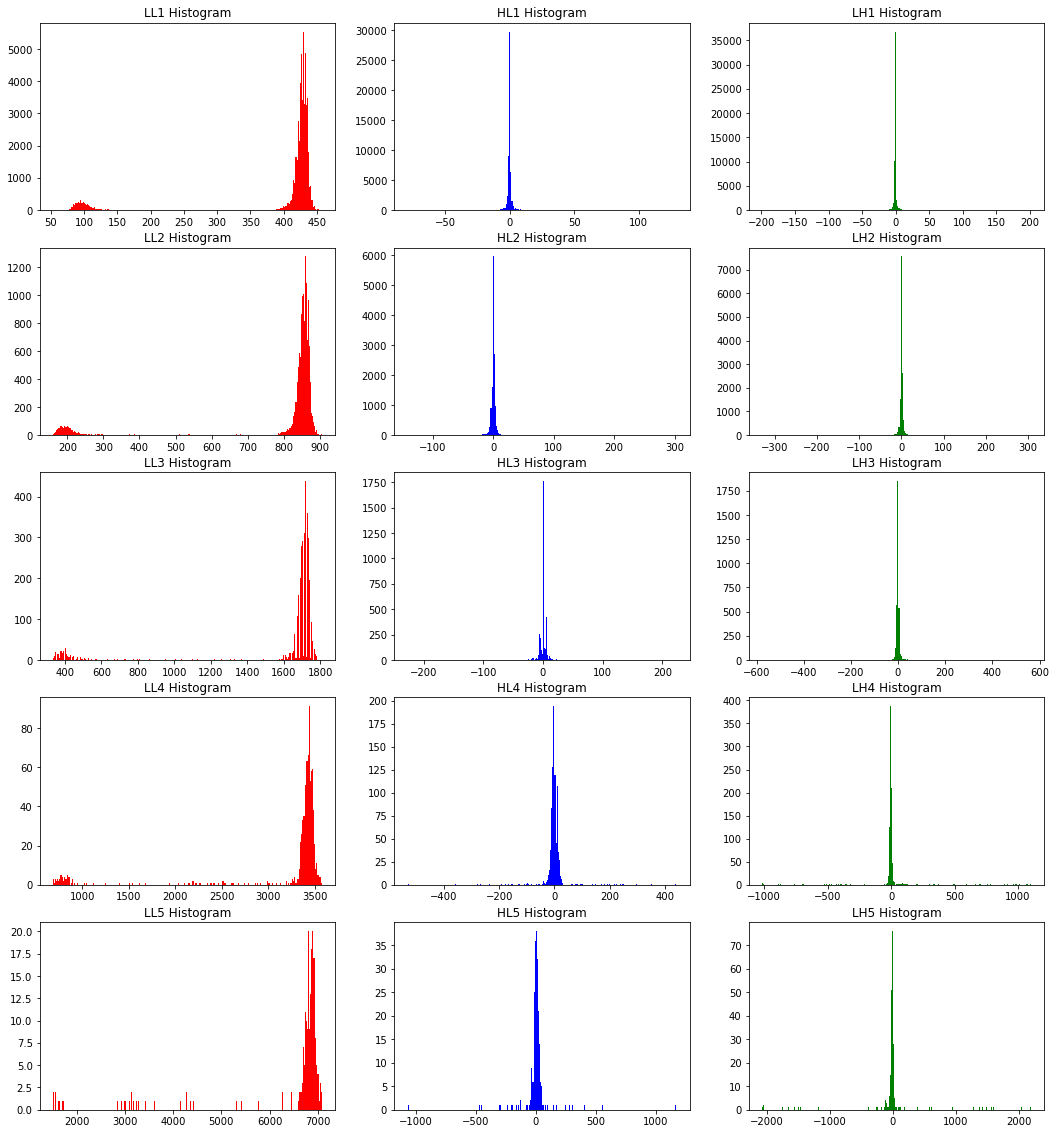

In [58]:
decompositions = [
    [LL1, HL1, LH1],
    [LL2, HL2, LH2],
    [LL3, HL3, LH3],
    [LL4, HL4, LH4],
    [LL5, HL5, LH5],
]
titles = [
    ['LL1 ', 'HL1 ', 'LH1 '],
    ['LL2 ', 'HL2 ', 'LH2 '],
    ['LL3 ', 'HL3 ', 'LH3 '],
    ['LL4 ', 'HL4 ', 'LH4 '],
    ['LL5 ', 'HL5 ', 'LH5 '],
]
colors = ['red', 'blue', 'green']
fig, axes = plt.subplots(5, 3)
fig.set_size_inches(18, 20)
for i in range(5):
    for j in range(3):
        flatten = np.ravel(decompositions[i][j])
        axes[i, j].set_title(titles[i][j] + "Histogram")
        axes[i, j].hist(flatten, bins=256,color=colors[j])
plt.show()

### Displaying all decomposed images

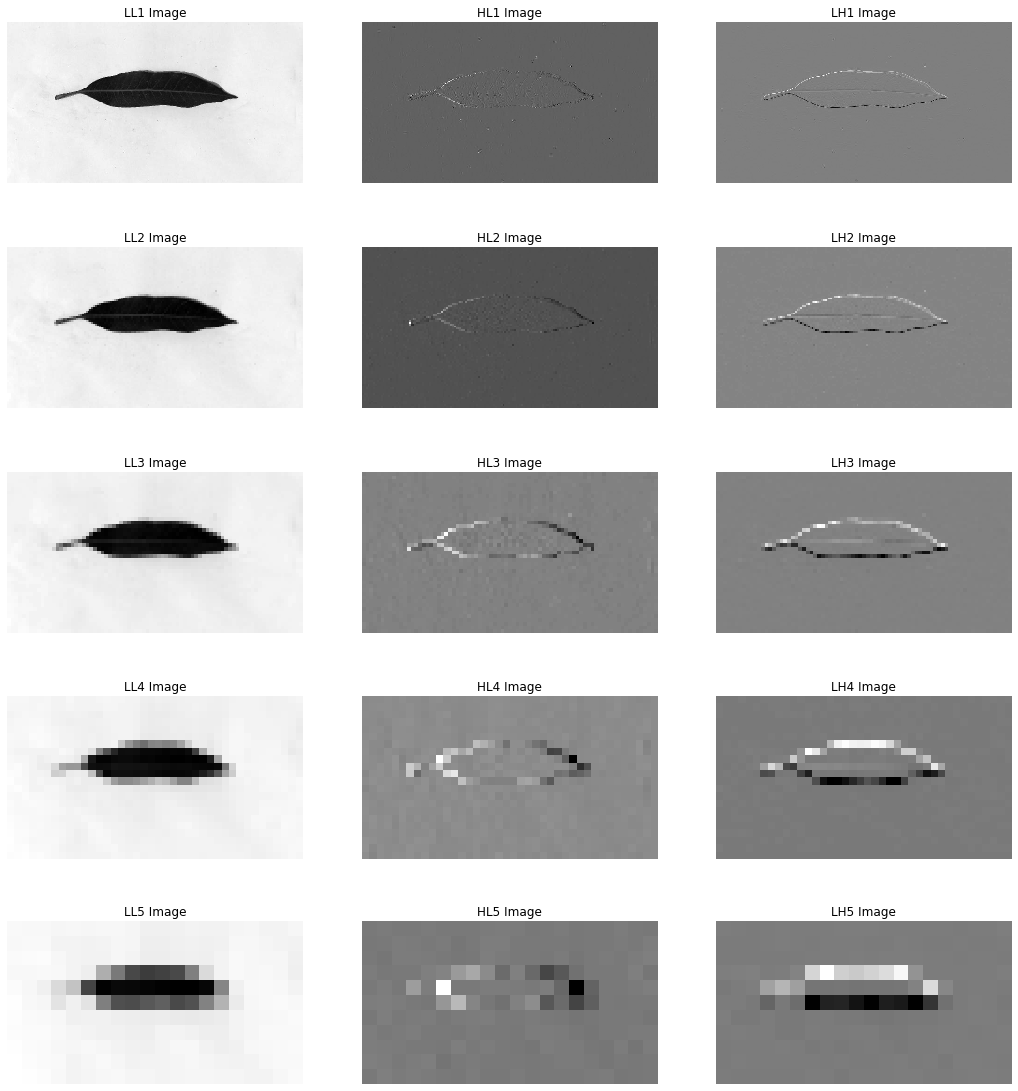

In [59]:
fig, axes = plt.subplots(5, 3)
fig.set_size_inches(18, 20)
for i in range(5):
    for j in range(3):
        axes[i, j].set_title(titles[i][j] + "Image")
        axes[i, j].set_axis_off()
        axes[i, j].imshow(decompositions[i][j], cmap="gray")
plt.show()

## Concatenation of all histograms into 256 x 10 matrix

In [60]:
concat_hist = np.stack(
    (LL1_hist, HL1_hist, LH1_hist,
     LL2_hist, HL2_hist, LH2_hist,
     LL3_hist, HL3_hist, LH3_hist,
     LL4_hist, HL4_hist, LH4_hist,
     LL5_hist, HL5_hist, LH5_hist,), axis=0)
concat_hist = MinMaxScaler().fit_transform(concat_hist)
print(concat_hist.shape)
print("Minimum Value : {0}\t Maximum Value : {1}".format(np.min(concat_hist), np.max(concat_hist)))

(15, 256)
Minimum Value : 0.0	 Maximum Value : 1.0000000000000002


## Applying Principal Component Analysis (PCA) for dimensionality reduction of 256 x 10 features matrix

In [61]:
pca = PCA(n_components=1)
result = pca.fit_transform(concat_hist)
print(result.shape)
print(np.ravel(result))
print("Minimum Value : {0}\t Maximum Value : {1}".format(np.min(result), np.max(result)))

(15, 1)
[ 3.42624459 -0.07727211  0.32526152  0.48286435 -0.37431929  0.05450703
 -0.21966538 -0.42625008 -0.24034005 -0.3541255  -0.44541809 -0.51891962
 -0.49527635 -0.57305625 -0.56423476]
Minimum Value : -0.5730562544673767	 Maximum Value : 3.4262445878892023


In [62]:
print("Min LL1 : {0}\tMax LL1 : {1}".format(np.min(LL1), np.max(LL1)))
print("Min LL2 : {0}\tMax LL2 : {1}".format(np.min(LL2), np.max(LL2)))
print("Min LL3 : {0}\tMax LL3 : {1}".format(np.min(LL3), np.max(LL3)))
print("Min LL4 : {0}\tMax LL4 : {1}".format(np.min(LL4), np.max(LL4)))
print("Min LL5 : {0}\tMax LL5 : {1}".format(np.min(LL5), np.max(LL5)))

Min LL1 : 53.500000000000014	Max LL1 : 457.0000000000001
Min LL2 : 160.25000000000003	Max LL2 : 905.7500000000002
Min LL3 : 335.5000000000001	Max LL3 : 1808.0000000000007
Min LL4 : 687.9375000000003	Max LL4 : 3572.0000000000027
Min LL5 : 1503.750000000001	Max LL5 : 7083.7812500000055


In [63]:
print("Min HL1 : {0}\tMax HL1 : {1}".format(np.min(HL1), np.max(HL1)))
print("Min HL2 : {0}\tMax HL2 : {1}".format(np.min(HL2), np.max(HL2)))
print("Min HL3 : {0}\tMax HL3 : {1}".format(np.min(HL3), np.max(HL3)))
print("Min HL4 : {0}\tMax HL4 : {1}".format(np.min(HL4), np.max(HL4)))
print("Min HL5 : {0}\tMax HL5 : {1}".format(np.min(HL5), np.max(HL5)))

Min HL1 : -79.00000000000001	Max HL1 : 129.0
Min HL2 : -141.75	Max HL2 : 302.7500000000001
Min HL3 : -226.87500000000023	Max HL3 : 223.00000000000006
Min HL4 : -531.8750000000001	Max HL4 : 441.1249999999998
Min HL5 : -1068.1250000000005	Max HL5 : 1171.187500000001


In [64]:
print("Min LH1 : {0}\tMax LH1 : {1}".format(np.min(LH1), np.max(LH1)))
print("Min LH2 : {0}\tMax LH2 : {1}".format(np.min(LH2), np.max(LH2)))
print("Min LH3 : {0}\tMax LH3 : {1}".format(np.min(LH3), np.max(LH3)))
print("Min LH4 : {0}\tMax LH4 : {1}".format(np.min(LH4), np.max(LH4)))
print("Min LH5 : {0}\tMax LH5 : {1}".format(np.min(LH5), np.max(LH5)))

Min LH1 : -199.0	Max LH1 : 201.5
Min LH2 : -329.7500000000001	Max LH2 : 306.0000000000001
Min LH3 : -576.5000000000002	Max LH3 : 562.5000000000002
Min LH4 : -1016.0625000000005	Max LH4 : 1099.375000000001
Min LH5 : -2072.031250000002	Max LH5 : 2192.062500000002
